In [48]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/TSLA.csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


Text(0, 0.5, 'Prices ($)')

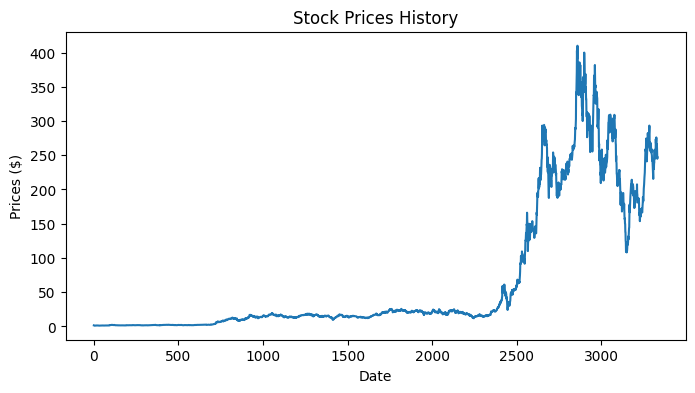

In [8]:
plt.figure(figsize=(8, 4))
plt.title('Stock Prices History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

Text(0, 0.5, 'Sales Volume')

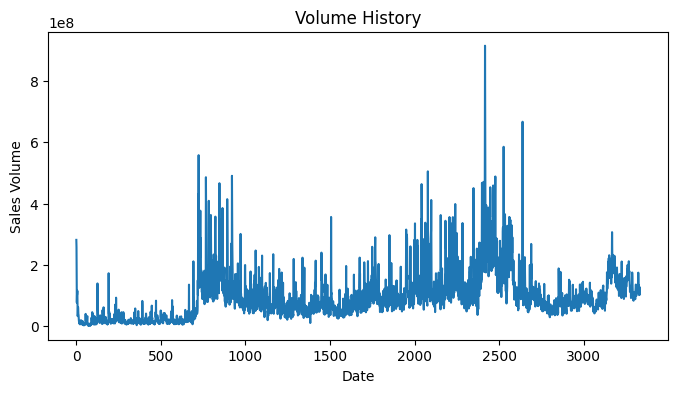

In [9]:
plt.figure(figsize=(8, 4))
plt.title('Volume History')
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Sales Volume')

In [10]:
ma_day = [10, 20, 50]

In [13]:
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()

In [17]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03,3324.000000,3314.000000,3284.000000
mean,67.126192,68.621136,65.511923,67.104357,67.104357,9.635133e+07,66.935594,66.739548,66.211862
std,99.701063,101.953068,97.210953,99.614210,99.614210,8.073736e+07,99.298307,98.925096,97.901664
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06,1.210200,1.285200,1.311467
25%,10.033333,10.331333,9.800000,10.031333,10.031333,4.533000e+07,10.171133,10.452558,10.628880
50%,16.740000,16.982000,16.500000,16.747334,16.747334,7.985400e+07,16.691900,16.623583,16.606107
75%,60.465332,60.870667,58.673332,59.960667,59.960667,1.230315e+08,56.951400,56.764800,54.945253
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,383.062668,373.152498,357.870532


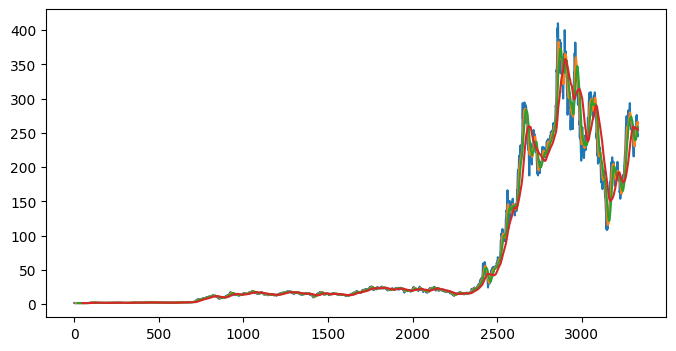

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']])

In [20]:
df['Daily Return'] = df['Adj Close'].pct_change()

In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN,NaN,NaN,-0.002512
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN,NaN,NaN,-0.078473
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN,NaN,NaN,-0.125683
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN,NaN,NaN,-0.160937


Text(0, 0.5, '% Daily Return')

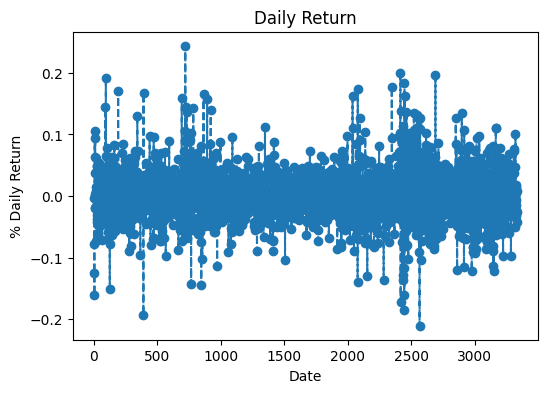

In [29]:
plt.figure(figsize=(6, 4))
plt.title('Daily Return')
plt.plot(df['Daily Return'],linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('% Daily Return')

In [35]:
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

Text(0, 0.5, 'Counts')

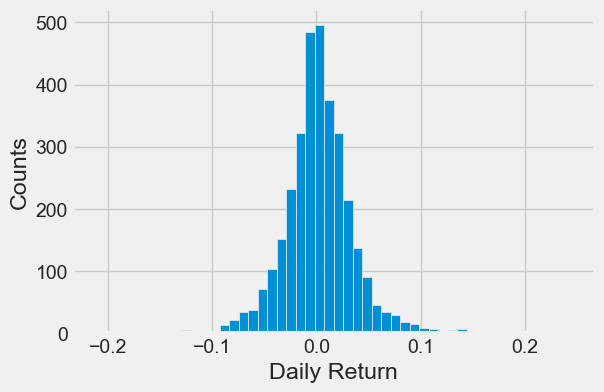

In [36]:
plt.figure(figsize=(6, 4))
df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')


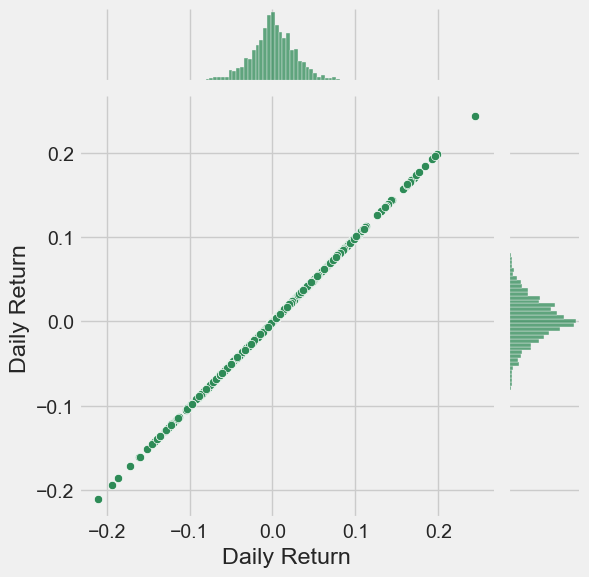

In [38]:
sns.jointplot(x="Daily Return", y="Daily Return", data=df, kind='scatter', color='seagreen')

Text(0, 0.5, 'Risk')

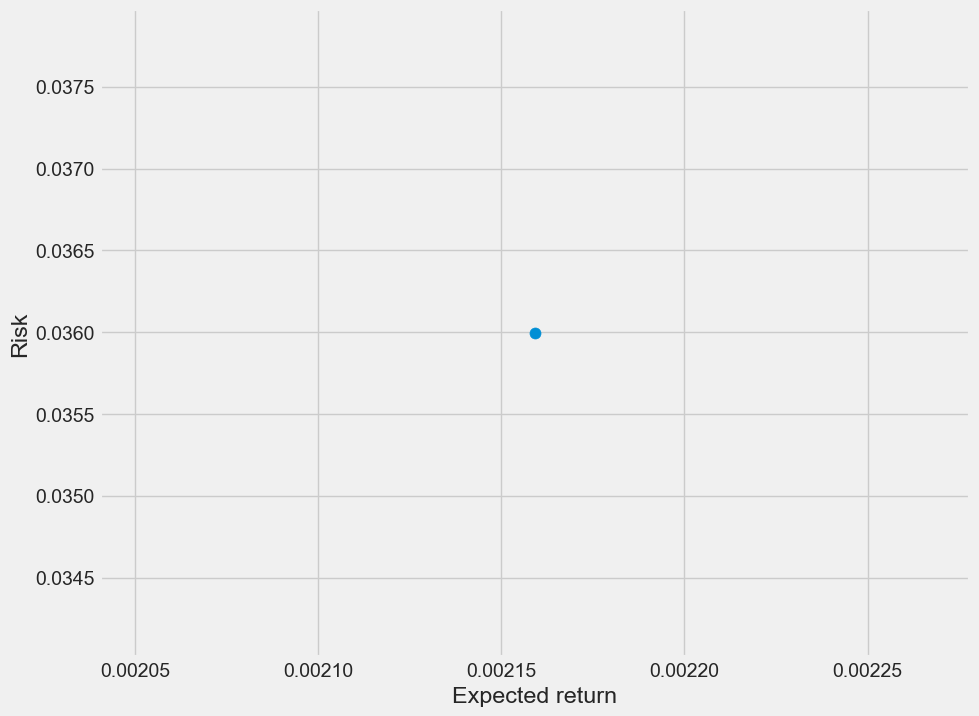

In [39]:
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(df["Daily Return"].mean(), df["Daily Return"].std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

In [49]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

# Calculate the sizes of each split
splitratio = [0.8,0.1,0.1]
total_length = len(dataset)
train_length = math.ceil(total_length* splitratio[0])
val_length = math.ceil(total_length* splitratio[1])
test_length = math.ceil(total_length* splitratio[2])

print(f' training_len = {train_length}, val_len = {val_length}')
# Split the data
train_data = dataset[:train_length]
test_data = dataset[train_length:train_length+val_length]
val_data = dataset[train_length+val_length:]

 training_len = 2667, val_len = 334


In [52]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_data)

# train_normd = train_normd.double()
val_data_norm = scaler.transform(val_data.reshape(-1, 1))
test_data_norm = scaler.transform(test_data.reshape(-1, 1))
scaled_data

array([[0.00183878],
       [0.00182515],
       [0.00140011],
       ...,
       [0.94583653],
       [0.89821918],
       [0.95081427]])

In [54]:
val_data_norm.shape

(332, 1)

In [57]:
from src.utils import *
from src.model import *

In [59]:
# Hyperparameters
input_size = 1  # Input size for each time step
hidden_size = 64  # Number of LSTM units
num_layers = 2  # Number of LSTM layers
batch_size = 64
num_epochs = 50
learning_rate = 0.001
window_size = 60
device = torch.device("mps")
best_model_params_path = "saving_dict"

In [60]:
model = LSTMNet(input_size, hidden_size, num_layers)
model = model.float()

In [61]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model = model.to(device)
model.train()
loss_dic = []

In [76]:
dataset = CustomDataset(scaled_data, window_size)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
val_dataset = CustomDataset(val_data_norm,window_size)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False)
test_dataset = CustomDataset(test_data_norm,window_size)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [64]:
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        inputs = inputs.view(-1, window_size, input_size)
        inputs = inputs.float()
        inputs = inputs.to(device)

        targets = targets.float()
        targets = targets.to(device)
        # print(inputs.shape,type(inputs),inputs.dtype)
        outputs = model(inputs)
        # print(outputs.shape,targets.shape)

        # print(targets)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        loss_dic.append(loss.item())
    # if (epoch + 1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Epoch [1/50], Loss: 0.010552952997386456
Epoch [2/50], Loss: 0.0009422024595551193
Epoch [3/50], Loss: 0.00040499604074284434
Epoch [4/50], Loss: 0.0001583671401022002
Epoch [5/50], Loss: 0.00012546411016955972
Epoch [6/50], Loss: 7.096475746948272e-05
Epoch [7/50], Loss: 0.00012879600399173796
Epoch [8/50], Loss: 1.7498163288109936e-05
Epoch [9/50], Loss: 1.9996758055640385e-05
Epoch [10/50], Loss: 0.00016513308219145983
Epoch [11/50], Loss: 0.00011652926332317293
Epoch [12/50], Loss: 2.804899850161746e-05
Epoch [13/50], Loss: 0.0003429290954954922
Epoch [14/50], Loss: 0.00017519383982289582
Epoch [15/50], Loss: 6.0528196627274156e-05
Epoch [16/50], Loss: 0.000609331764280796
Epoch [17/50], Loss: 0.00030451000202447176
Epoch [18/50], Loss: 0.000138379298732616
Epoch [19/50], Loss: 0.00021797596127726138
Epoch [20/50], Loss: 0.00011232274846406654
Epoch [21/50], Loss: 0.00033050397178158164
Epoch [22/50], Loss: 6.162942736409605e-05
Epoch [23/50], Loss: 3.752011252800003e-05
Epoch [24/

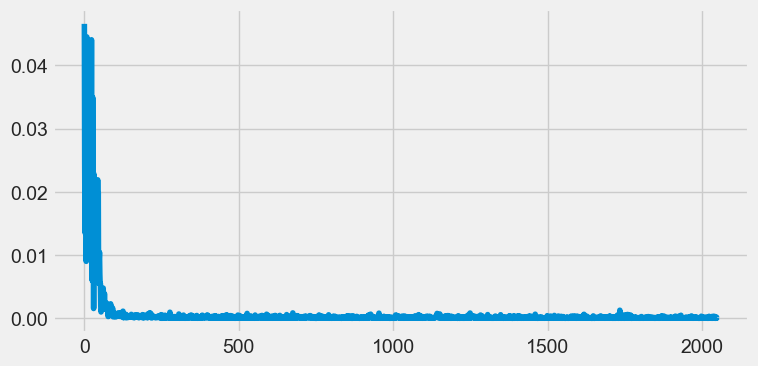

In [66]:
plt.figure(figsize=(8, 4))
plt.plot(loss_dic)

In [67]:
torch.save(model.state_dict(), best_model_params_path)

In [73]:
model.eval()
model.to("cpu")

LSTMNet(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [82]:
pred = []
tar = []
for inputs, targets in val_dataloader:
    inputs = inputs.float()
    predictions = model(inputs)
#     print(predictions,targets)
    pred.append(predictions.squeeze().item())
    tar.append(targets.squeeze().item())

In [85]:
squared_diff = [(x1 - x2) ** 2 for x1, x2 in zip(pred, tar)]
mean_squared_diff = sum(squared_diff) / len(pred)
rmse = math.sqrt(mean_squared_diff)
rmse

0.03655400806307061

In [94]:
train_data = scaler.inverse_transform(scaled_data)
val_data = scaler.inverse_transform(np.array(pred).reshape(-1, 1))
true_val = scaler.inverse_transform(np.array(tar).reshape(-1, 1))

In [102]:
real = np.concatenate((train_data, true_val))
pred = np.concatenate((train_data, val_data))

In [103]:
real.shape

(2939, 1)

In [104]:
pred.shape

(2939, 1)

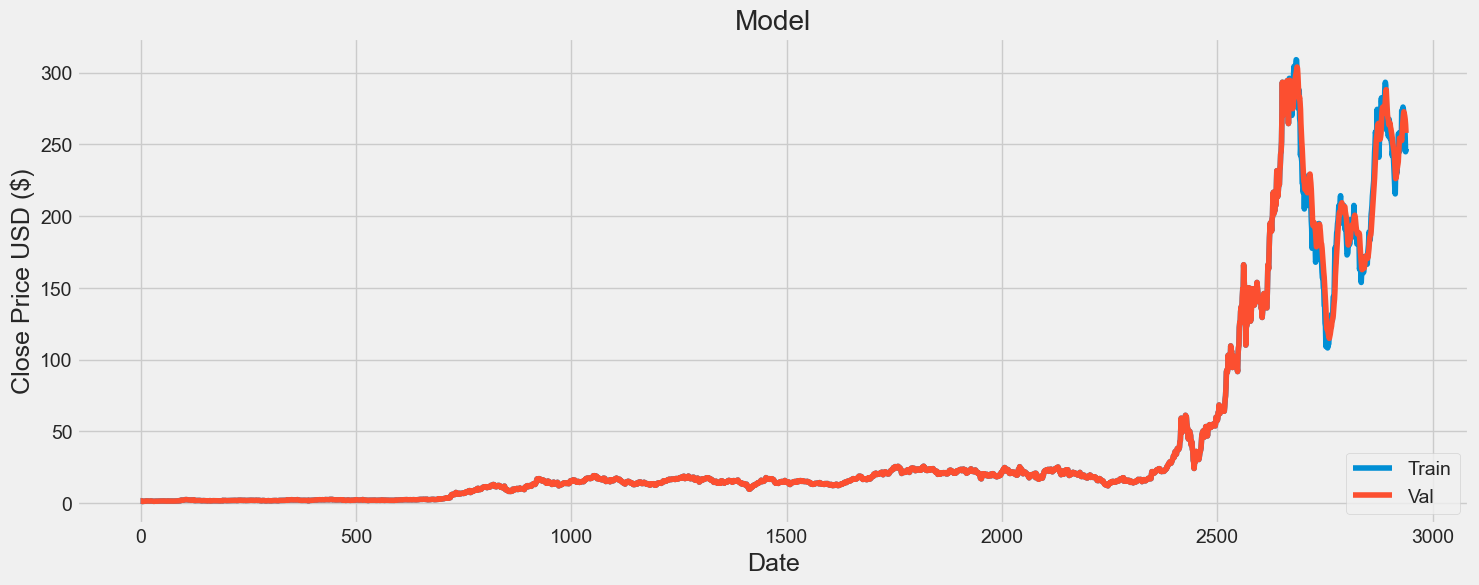

In [105]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(real)
plt.plot(pred)
# plt.plot()
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [106]:
#  In real time, we are predicting new values and we are using them to predict next values
